In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
base_credit = pd.read_csv(r"D:\Biblioteca\Documents\Machine_Learning\pre_processamento_dados\parte 1\credit_data.csv")

In [6]:
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [7]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


# Visualização dos dados

In [8]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

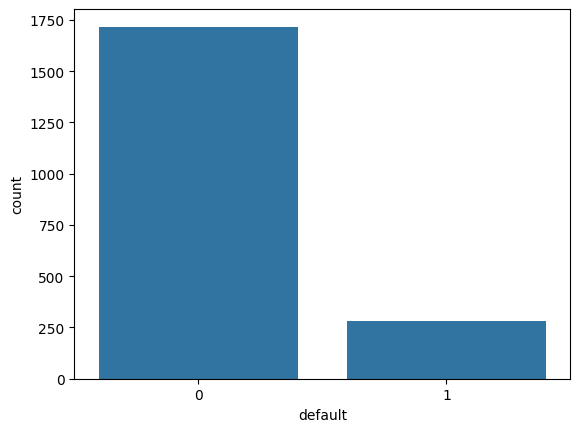

In [9]:
sns.countplot(x=base_credit['default']);

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

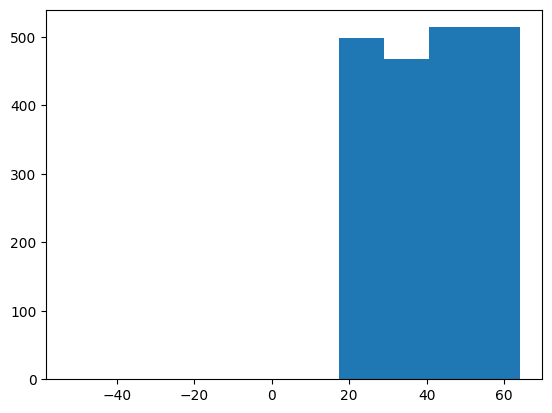

In [10]:
plt.hist(x=base_credit['age'])

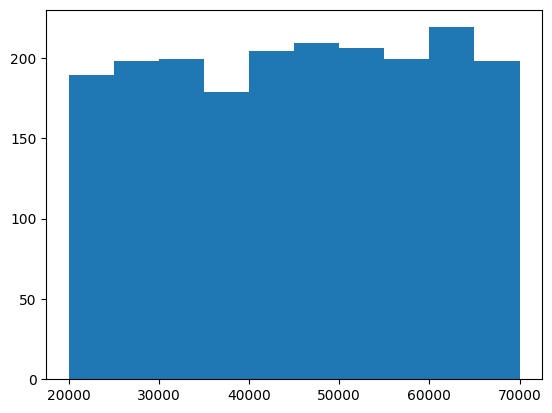

In [11]:
# Distribuição das dividas
plt.hist(base_credit['income']);

# Tratamentos de valores inconsistentes

Só para lembrar, aqui são apenas alguns exemplos, em modelos futuros podem ter outros tipos de infromações que precisam desses tratamentos (Ou algo parecido)

In [12]:
# Tratamento para verificar se tem pessoas com idades negativas
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [13]:
# Fazendo o tratamento de informações da coluna idade, pois após analise, vi que tem 3 pessoas com idades negativas

base_credit.mean()

media_idade = base_credit.loc[base_credit['age'] > 0].mean()
base_credit.loc[base_credit['age'] < 0, 'age'] = media_idade

# Tratamento de valores faltantes

In [14]:
# O código abaixo retorna True, se tiver um valor faltante na base
# Como eu coloquei o .sum(), agora ele vai retornar a quantidade de valores faltantes

base_credit.isnull()
# base_credit.isnull().sum()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [15]:
# Inseri a média dos valores no lugar dos valores nulos
# Como não tem informações nulas, então não vou executar o código abaixo

# base_credit.fillna(base_credit.loc[:, 'person_emp_length'].mean(), inplace=True)
# base_credit.fillna(base_credit.loc[:, 'loan_int_rate'].mean(), inplace=True)

In [16]:
# base_credit.isnull().sum()

# Divisão entre previsores e classe

In [17]:
# Aqui eu separei as informações de treino por categoricas, pois vou aplicar a padronização
# nas variaveis numericas

X_credit = base_credit[["income", "age", "loan"]].values

In [18]:
y_credit = base_credit['default'].values


# Escalonamento dos valores

É uma boa prática ver os valores minimos e maximos das colunas, para isso usar as funções min e max. Geralmente quando se tem uma diferença muito grande entre os valores minimos, é recomendavel aplicar uma normalização, para que os valores fiquem na mesma escala.

Existem dois tipos de normalização, sendo eles: Padronização (Standardisation) e Normalização (Normalization). Onde geralmente o metodo da Padronização é mais recomendado para casos onde existam Outliers na base

In [19]:
# X_credit[:, 0].max(), X_credit[:, 1].max()

In [20]:
base_padroniza = base_credit[["income", "age", "loan"]]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit_padroniza = scaler_credit.fit_transform(base_padroniza)

In [22]:
X_credit_padroniza

array([[ 1.45393393,  1.36333045,  1.20281942],
       [-0.76217555,  0.54184472,  0.69642695],
       [ 0.83682073,  1.67165787,  1.17471147],
       ...,
       [-0.07122592, -0.97302324,  0.35420081],
       [-0.11000289,  1.73675551, -0.92675625],
       [ 1.682986  ,  1.14745046,  0.96381038]])

In [23]:
# X_credit = np.concatenate([X_credit, X_credit_padroniza], axis=1)

Só para explicar, eu tive que separar as informações categoricas das numericas, antes de aplicar a padronização, e como as informações foram convertidas para uma matriz numpy, eu apenas concatenei as duas matrizes por coluna, já que a ordem das colunas não influenciam no treinamento do modelo (desde que ja tenham sido tratadas e a coluna objetivo já tenha sido armazenada em y)

Isso aconteceu quando eu tinha pegado a base errada, mas fica como aprendizado para possiveis bases futuras

In [24]:
print(X_credit_padroniza[0])

[1.45393393 1.36333045 1.20281942]


# Dividindo a base em treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, 
                                                                                              test_size=0.25, 
                                                                                              random_state=0
                                                                                              )

# Salvando a base após realizada os procedimentos de pré-processamento

In [27]:
import pickle

In [28]:
with open(r'D:\Biblioteca\Documents\Machine_Learning\pre_processamento_dados\base_final\credit.pkl', mode='wb') as f:
    pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)